# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [1]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np

#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print('y_train shape:', y_train.shape)

print(y_train.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
y_train shape: (50000, 1)
50000 test samples


## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

In [2]:
np.shape(x_train)

(50000, 32, 32, 3)

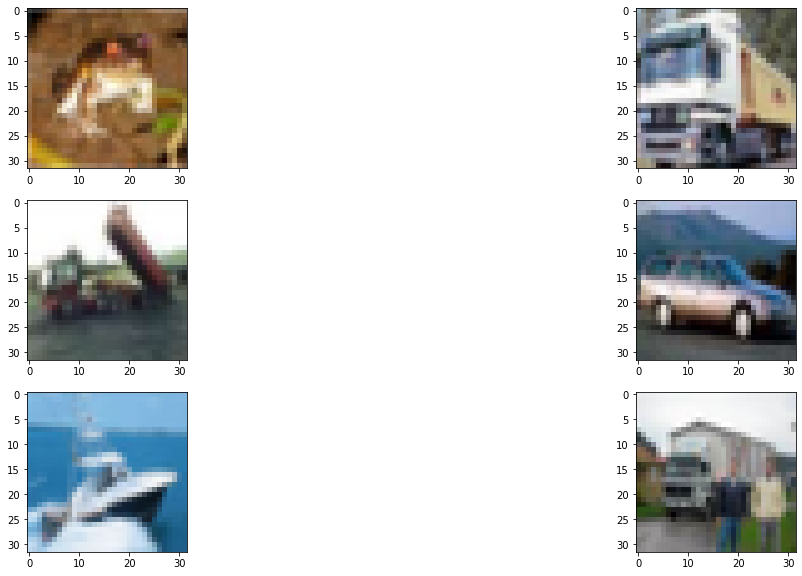

In [3]:
from matplotlib import pyplot as plt
fig,ax=plt.subplots(3,2,figsize=(20,10))
ax[0][0].imshow(x_train[0])
ax[0][1].imshow(x_train[1])
ax[1][0].imshow(x_train[2])
ax[1][1].imshow(x_train[4])
ax[2][0].imshow(x_train[8])
ax[2][1].imshow(x_train[16])
plt.show()

In [9]:
# (3) Create a sequential model
model = Sequential()


# Add layers
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

# Layer
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

# Layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

    
# Train the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)         

In [10]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 3.3373 - accuracy: 0.1529
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7796 - accuracy: 0.3258
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5698 - accuracy: 0.4229
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4636 - accuracy: 0.4758
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3745 - accuracy: 0.5082
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3257 - accuracy: 0.5285
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2628 - accuracy: 0.5521
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2288 - accuracy: 0.5667
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1939 - accuracy: 0.5760
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.175

In [11]:
loss,acc=model.evaluate(x_test,y_test)
print(loss)
print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.1233 - accuracy: 0.6063
1.123298168182373
0.6062999963760376


In [7]:
!pip install -U keras-tuner

     |████████████████████████████████| 71kB 5.0MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=310aac17405725e340e9b367e3d731476ec8cf2194a0bcbbdf9c8de763d2f664
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=3a96cc6298da6379c4d09c8d1d757d092e7d9b2c039fc45731b20a624705e31b
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [18]:
import kerastuner as kt

from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch


class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = keras.Sequential()
        model.add(
            Conv2D(
                filters=16,
                kernel_size=3,
                activation='relu',
                input_shape=self.input_shape
            )
        )
        model.add(
            Conv2D(
                filters=16,
                activation='relu',
                kernel_size=3
            )
        )
        model.add(MaxPooling2D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.5,
                default=0.25,
                step=0.05,
            ))
        )
        model.add(
            Conv2D(
                filters=32,
                kernel_size=3,
                activation='relu'
            )
        )
        model.add(
            Conv2D(
                filters=hp.Choice(
                    'num_filters',
                    values=[32, 64],
                    default=64,
                ),
                activation='relu',
                kernel_size=3
            )
        )
        model.add(MaxPooling2D(pool_size=2))
        model.add(
            Dropout(rate=hp.Float(
                'dropout_2',
                min_value=0.0,
                max_value=0.5,
                default=0.25,
                step=0.05,
            ))
        )
        model.add(Flatten())
        model.add(
            Dense(
                units=hp.Int(
                    'units',
                    min_value=32,
                    max_value=512,
                    step=32,
                    default=128
                ),
                activation='relu'
            )
        )
        model.add(
            Dropout(
                rate=hp.Float(
                    'dropout_3',
                    min_value=0.0,
                    max_value=0.5,
                    default=0.25,
                    step=0.05
                )
            )
        )
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Float(
                    'learning_rate',
                    min_value=1e-4,
                    max_value=1e-2,
                    sampling='LOG',
                    default=1e-3
                )
            ),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model



hypermodel = CNNHyperModel(input_shape=(32,32,3), num_classes=num_classes)

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=2,
)

tuner.search(x_train, y_train, epochs=40, validation_split=0.1)

Trial 20 Complete [00h 08m 02s]
val_accuracy: 0.7364999949932098

Best val_accuracy So Far: 0.773499995470047
Total elapsed time: 02h 42m 36s
INFO:tensorflow:Oracle triggered exit


In [19]:
# Show a summary of the search
tuner.results_summary()

# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0] 

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
dropout_1: 0.1
num_filters: 64
dropout_2: 0.4
units: 448
dropout_3: 0.45
learning_rate: 0.00022112553422081095
Score: 0.773499995470047
Trial summary
Hyperparameters:
dropout_1: 0.35000000000000003
num_filters: 64
dropout_2: 0.1
units: 288
dropout_3: 0.4
learning_rate: 0.0002700698396331433
Score: 0.7714000046253204
Trial summary
Hyperparameters:
dropout_1: 0.1
num_filters: 64
dropout_2: 0.25
units: 192
dropout_3: 0.4
learning_rate: 0.00046661469927080176
Score: 0.7547999918460846
Trial summary
Hyperparameters:
dropout_1: 0.35000000000000003
num_filters: 32
dropout_2: 0.5
units: 256
dropout_3: 0.05
learning_rate: 0.00044124415805296913
Score: 0.7497999966144562
Trial summary
Hyperparameters:
dropout_1: 0.2
num_filters: 32
dropout_2: 0.2
units: 128
dropout_3: 0.15000000000000002
learning_rate: 0.00020002585510246515
Score: 0.7470999956130981

In [20]:
loss,acc=best_model.evaluate(x_test, y_test)
print(loss)
print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.6815 - accuracy: 0.7697
0.6979011297225952
0.7620000243186951
